# EM Algorithm for GMM

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [117]:
# load csv into pandas dataframe
df = pd.read_csv('SMAI-Dataset-customer-dataset/data.csv')
df.head()

,Index,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0,67,2,124670,1,2
1,1,1,1,22,1,150773,1,2
2,2,0,0,49,1,89210,0,0
3,3,0,0,45,1,171565,1,1
4,4,0,0,53,1,149031,1,1


In [118]:
# drop the index column from the dataframe
df = df.drop('Index',axis=1)

# convert the dataframe into numpy array
data = df.values
print("Shape of the data:",data.shape)
print("First row of the data:",data[1])

Shape of the data: (2000, 7)
First row of the data: [     1      1     22      1 150773      1      2]


In [119]:
'''Find the parameters of GMM associated with the customer-dataset, us-
ing the EM method. 
1. Vary the number of components, and observe the results. 
2. Implement GMM in a class which has the routines to 
    - fit data (e.g.gmm.fit(data, number of clusters))
    - obtain the parameters, 
    - obtain the likelihoods of the data samples,
    - obtain the membership values of data samples.'''

class GMM:
    def __init__(self, n_components=3, max_iter=5, tolerance= 1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tolerance = tolerance
        
    def fit(self, X):
        self.n_samples, self.n_features = X.shape

        # initialize data after normalization
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        self.X = X
        
        # initialize parameters
        self.weights = np.ones(self.n_components) / self.n_components
        # self.means = np.random.choice(self.X.flatten(), size=self.n_components)
        # Initialize an empty array to store the means
        self.means = np.empty((self.n_components, self.n_features))

        # Iterate over each component
        for k in range(self.n_features):
            # Randomly sample initial means for each feature
            self.means[:, k] = np.random.choice(self.X[:, k], size=self.n_components)
        # print("means", self.means)

        self.covariances = np.ones((self.n_components, self.n_features, self.n_features))
        for i in range(self.n_components):
            np.fill_diagonal(self.covariances[i], 5)
            # print(np.linalg.det(self.covariances[i]))
        
        # self.log_likelihoods = []
        for i in range(self.max_iter):
            # E step
            self.memberships = self._expectation()
            # M step
            self._maximization()

            # compute log likelihood
            log_likelihood = self._log_likelihood()
            # self.log_likelihoods.append(log_likelihood)
            print("log_likelihood", log_likelihood)

            # print the column number which holds the maximum value for each row
            # if i == self.max_iter - 1:
            #     print("membership values for last iteration")

            #     # print the column number along with values
            #     print("Column number: ", np.argmax(self.memberships, axis=1), "Column value: ", np.max(self.memberships, axis=1))


    def _expectation(self):
        memberships = np.zeros((self.n_samples, self.n_components))
        for i in range(self.n_components):
            memberships[:, i] = self.weights[i] * self._gaussian(self.X, self.means[i], self.covariances[i])
        memberships = memberships / (np.sum(memberships, axis=1, keepdims=True) + 1e-16)
        return memberships
    
    def _maximization(self):
        for i in range(self.n_components):
            # update weights
            self.weights[i] = np.mean(self.memberships[:, i])
            # update means
            self.means[i] = np.dot(self.memberships[:, i], self.X) / (np.sum(self.memberships[:, i]) + 1e-16)
            # update covariances
            self.covariances[i] = np.dot(self.memberships[:, i] * (self.X - self.means[i]).T, (self.X - self.means[i])) / (np.sum(self.memberships[:, i]) + 1e-16)
            # add a small constant to avoid numerical instability
            self.covariances[i] += 1e-6 * np.identity(self.n_features)


    def _log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            # self.covariances[i] += 1e-6 * np.identity(self.n_features)
            log_likelihood += np.sum(self.memberships[:, i] * np.log(1e-6+ self.weights[i] * self._gaussian(self.X, self.means[i], self.covariances[i])))
        return log_likelihood
    
    def _gaussian(self, X, mean, covariance):
        # print("X", X[0])
        # print("mean", mean)
        # print("covariance", covariance)
        answer = multivariate_normal.pdf(X, mean, covariance)
        # print("answer", answer)
        return answer
        
    
    def obtain_memberships(self, X):
        memberships = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            memberships[:, i] = self.weights[i] * self._gaussian(X, self.means[i], self.covariances[i])
        return memberships
    
    def obtain_likelihoods(self, X):    # for a given set of samples
        likelihoods = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            likelihoods[:, i] = self._gaussian(X, self.means[i], self.covariances[i])
        return likelihoods
    
    def get_params(self):
        return self.weights, self.means, self.covariances


In [120]:
# fit the GMM model to the data
gmm = GMM(n_components=3, max_iter=10)

gmm.fit(data)

log_likelihood -18148.480683688278
log_likelihood -17895.90010651898
log_likelihood -17636.462296459147
log_likelihood -17389.44811232879
log_likelihood -16699.734152018722
log_likelihood -11300.590156479244
log_likelihood -6070.729886435303
log_likelihood -3961.916293891826
log_likelihood -3825.5544993802714
log_likelihood -3175.2612533287643


## Wine Dataset
Perform clustering on the wine-dataset using Gaussian Mixture Model
(GMM) and K-Means algorithms.

In [121]:
from sklearn.datasets import load_wine
data = load_wine()

# convert to a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [122]:
# obtain ground truth labels
y = data.target
print("Ground truth labels:",y)

Ground truth labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [123]:
# convert the dataframe into numpy array
data = df.values
print("Shape of the data:",data.shape)

# normalise the data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

Shape of the data: (178, 13)


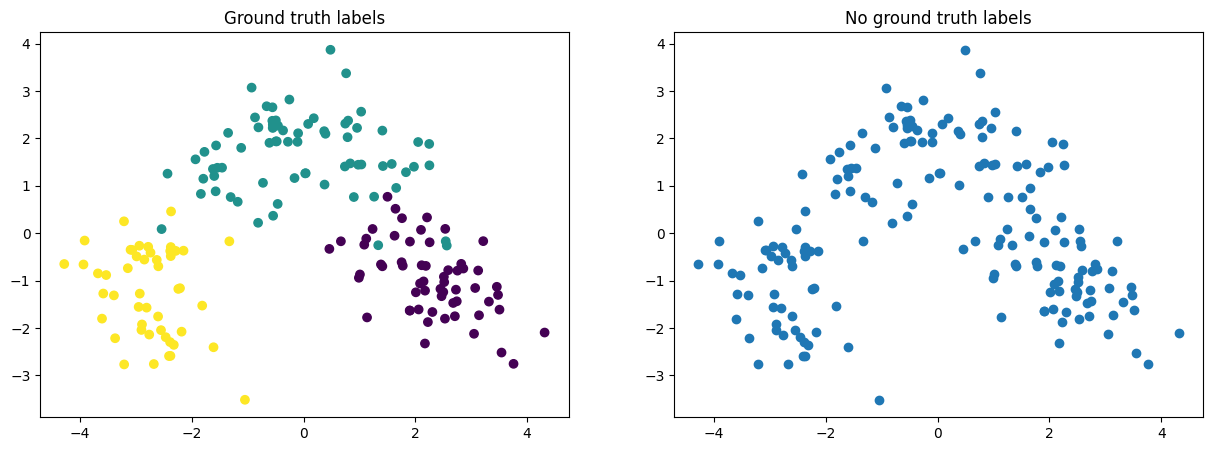

In [124]:
# perform PCA on the data with 2 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit the data
pca.fit(data)

# transform the data
data = pca.transform(data)

plt.figure(figsize=(15,5))
# make 2 subplots with and without ground truth labels
plt.subplot(121)
plt.title("Ground truth labels")
plt.scatter(data[:,0], data[:,1], c=y)
plt.subplot(122)
plt.title("No ground truth labels")
plt.scatter(data[:,0], data[:,1])
plt.show()

### K Means

/home/anika/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


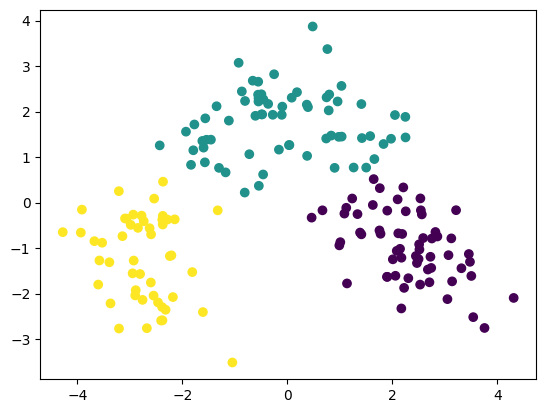

In [125]:
# cluster these points using sklearn K means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# plot the data points with the cluster labels
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.show()

In [126]:
# silhoutte score for the clustering
from sklearn.metrics import silhouette_score
print("Silhouette score for the clustering:",silhouette_score(data, kmeans.labels_))

Silhouette score for the clustering: 0.5615238075263913


### GMM

log_likelihood -699.2702637714247
log_likelihood -698.5652972617677
log_likelihood -697.2148935074576
log_likelihood -694.6114933716614
log_likelihood -689.4403013617036
log_likelihood -678.8335315416779
log_likelihood -656.8303809814254
log_likelihood -618.2885393178067
log_likelihood -575.2474145467688
log_likelihood -537.0305310162092
Shape of the memberships: (178, 3)


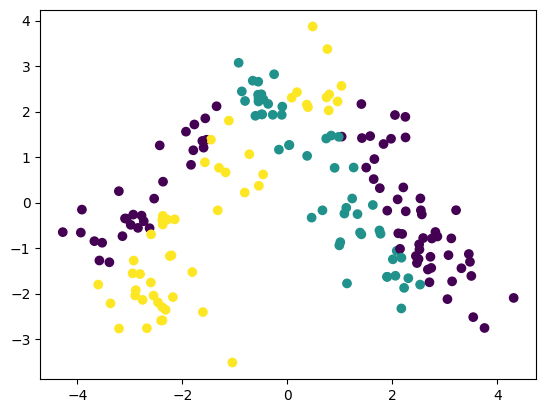

In [127]:
gmm = GMM(n_components=3, max_iter=10)

gmm.fit(data)

# obtain the memberships
memberships = gmm.obtain_memberships(data)
print("Shape of the memberships:",memberships.shape)

# plot the data points with the cluster labels
# let the cluster colours be linear combinations of the membership values

plt.scatter(data[:,0], data[:,1], c=np.argmax(memberships, axis=1))
plt.show()

In [128]:
# calculate the silhouette score
print("Silhouette score for the clustering:",silhouette_score(data, np.argmax(memberships, axis=1)))

Silhouette score for the clustering: 0.02325819232290061


### Finding optimal number of clusters using AIC

log_likelihood -505.1383282371807
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -628.3720562565401
log_likelihood -628.2691689349211
log_likelihood -628.0595211834128
log_likelihood -627.627256663241
log_likelihood -626.7179797197892
log_likelihood -624.7718832371597
log_likelihood -620.540292645946
log_likelihood -611.2091317851912
log_likelihood -590.7190948134275
log_likelihood -551.4527921846399
log_likelihood -694.951534395537
log_likelihood -692.227513317157
log_likelihood -686.9492697871981
log_likelihood -676.13928555649
log_likelihood -652.4480386466888
log_likelihood -612.6729387466462
log_likelihood -571.4933886969809
log_likelihood -541.0242269177414
log_likelihood -521.0989215133134
log_likelih

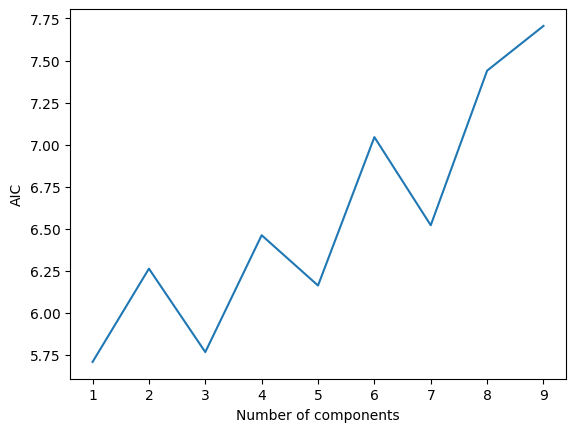

In [130]:
# using AIC to find the optimal number of clusters
''' AIC = -2/N * LL + 2 * k/N
Where N is the number of examples in the training dataset, 
LL is the log-likelihood of the model on the training dataset, and k is the number of parameters in the model
'''

# calculate the AIC for the GMM model
def aic(X, gmm):
    # calculate the log likelihood
    log_likelihood = gmm._log_likelihood()
    # calculate the number of parameters
    k = gmm.n_components * (gmm.n_features + 1)
    # calculate the AIC
    aic = -2 * log_likelihood + 2 * k
    aic = aic / X.shape[0]
    return aic

# calculate the AIC for different number of clusters
n_components = np.arange(1, 10)
aics = []
for n in n_components:
    gmm = GMM(n_components=n, max_iter=10)
    gmm.fit(data)
    aics.append(aic(data, gmm))

# plot the AIC values
plt.plot(n_components, aics)
plt.xlabel("Number of components")
plt.ylabel("AIC")
plt.show()

#### Conclusion:
Optimal Cluster number is 3

### Calculating using BIC

log_likelihood -505.1383282371812
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -505.13832823718235
log_likelihood -625.8542565463538
log_likelihood -624.9096336501618
log_likelihood -623.3710903960758
log_likelihood -620.8366178009146
log_likelihood -616.5223189259929
log_likelihood -608.8823677697287
log_likelihood -594.9035851516026
log_likelihood -570.2368040092545
log_likelihood -538.4225001238085
log_likelihood -514.991647004703
log_likelihood -696.7617962981224
log_likelihood -693.5761503628505
log_likelihood -687.1091058356643
log_likelihood -674.1210054115957
log_likelihood -648.2058003970901
log_likelihood -604.3401794491103
log_likelihood -559.091815086548
log_likelihood -525.3241429122259
log_likelihood -508.58797851881167
log_li

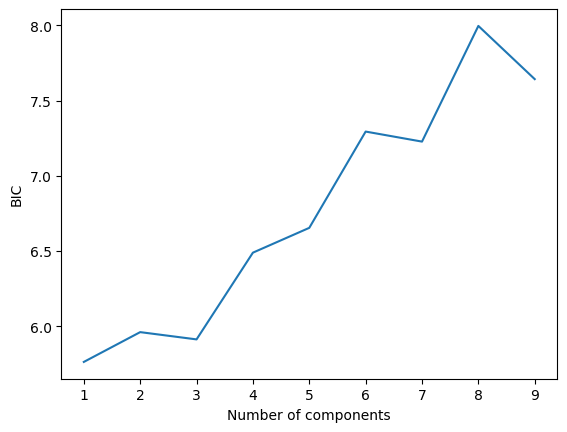

In [131]:
'''
BIC = -2 * LL + log(N) * k
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, 
N is the number of examples in the training dataset, and k is the number of parameters in the model.
'''

# calculate the BIC for the GMM model
def bic(X, gmm):
    # calculate the log likelihood
    log_likelihood = gmm._log_likelihood()
    # calculate the number of parameters
    k = gmm.n_components * (gmm.n_features + 1)
    # calculate the BIC
    bic = -2 * log_likelihood + np.log(X.shape[0]) * k
    bic = bic / X.shape[0]
    return bic

# calculate the BIC for different number of clusters
n_components = np.arange(1, 10)
bics = []
for n in n_components:
    gmm = GMM(n_components=n, max_iter=10)
    gmm.fit(data)
    bics.append(bic(data, gmm))

# plot the BIC values
plt.plot(n_components, bics)
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.show()